In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import os 

In [7]:
#os.environ["path"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin;'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv(r"Dataset\diabetes.csv", header=0, names=col_names)
print(data.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [8]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = data[feature_cols]
y = data.label

In [9]:
#print("splitting dataset into training set and test set")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
#print("creating decision tree classifier object")
clf =RandomForestClassifier(criterion="entropy")
#print("training decision tree classifier")
clf = clf.fit(x_train, y_train)
#print("predicting the response for test dataset")
y_pred = clf.predict(x_test)
#print("claculating model accuracy how often is the classifier correct")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()

Accuracy: 0.7705627705627706



d:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


d:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.7835497835497836



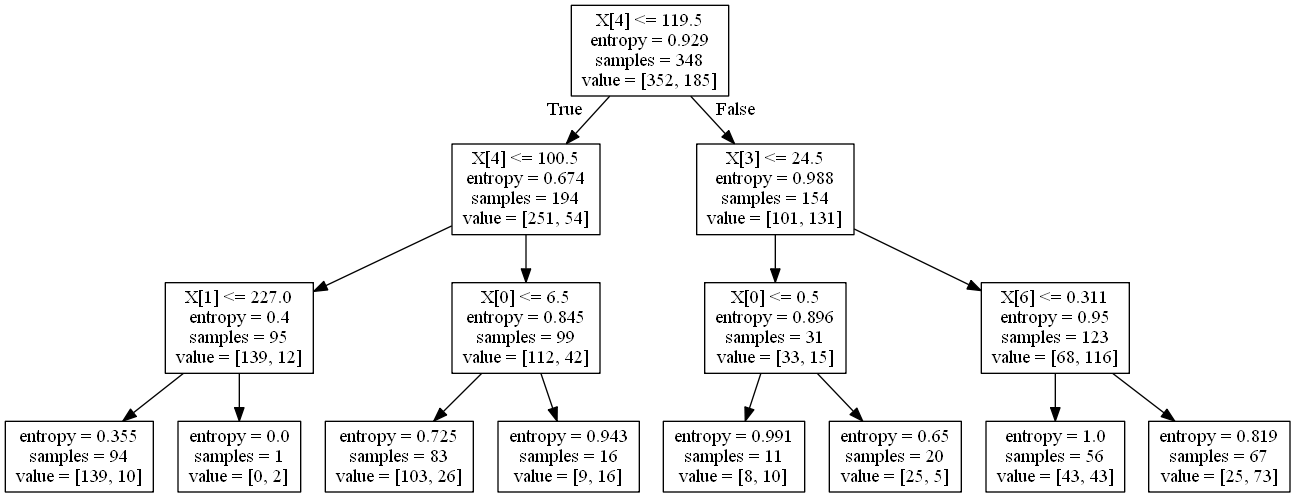

In [10]:
from sklearn.externals.six import StringIO
dot_data = StringIO()
from sklearn.tree import export_graphviz
from sklearn import tree
clf =RandomForestClassifier(criterion="entropy", max_depth=3)
#print("training decision tree classifier")
clf = clf.fit(x_train, y_train)
#print("predicting the response for test dataset")
y_pred = clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()
tree.export_graphviz(clf.estimators_[0], out_file='diabetes2.dot')
graph = pydotplus.graph_from_dot_file('diabetes2.dot')
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes2.png')
Image(graph.create_png())